# Team 5: Universal Basic Income
### Author: Tsung-Han Yu

In this notebook, I will be analyzing various data from WIC Programs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Supplemental Nutrition Assistance Program (SNAP) 

The Supplemental Nutrition Assistance Program (SNAP) is the largest federal nutrition assistance program. SNAP provides benefits to eligible low-income individuals and families via an Electronic Benefits Transfer card. This card can be used like a debit card to purchase eligible food in authorized retail food stores.

source: https://www.benefits.gov/benefit/361

## **Question**: How many people participate in SNAP programs?

According to the summary in sheet `Dashboard` of `DTA_ZIPCODE_Report_DEC_2022.v2.xlsx`, there are **628,173 households** (`CASES` in photo) and **1,036,726 people** (`CLIENTS` in photo) getting SNAP assistance in Massachusetts.

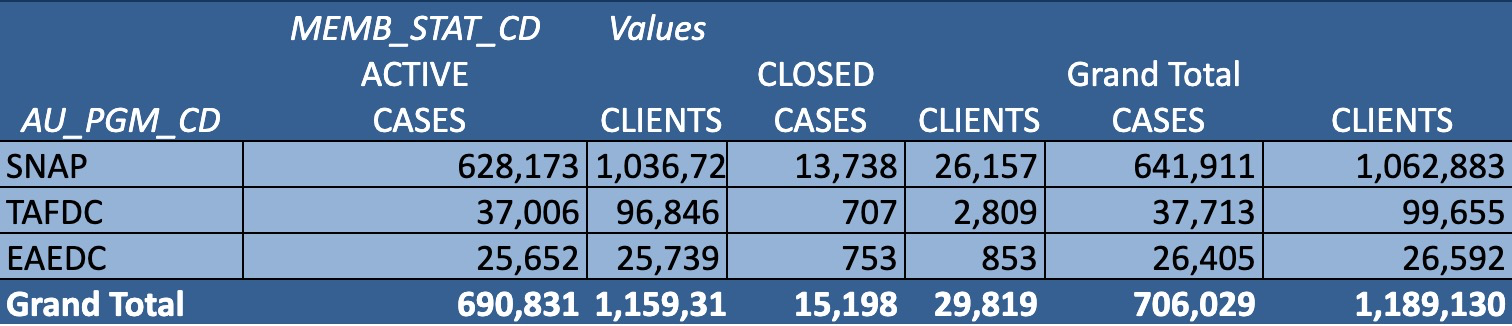

Let's load the raw data and see if we get the same number and then do some analysis or visualization.

In [2]:
caseload = pd.read_excel('DTA_ZIPCODE_Report_DEC_2022.v2.xlsx', sheet_name='Reported Month Caseload Data ', dtype={'ZIP_CODE': str})
caseload

CYCLE_MONTH AU_PGM_CD       CITY MEMB_STAT_CD ZIP_CODE     COUNTY  CASES  \
0     2022-12-01     EAEDC   ABINGTON       ACTIVE    02351   PLYMOUTH   26.0   
1     2022-12-01     EAEDC      ACTON       ACTIVE    01718  MIDDLESEX    NaN   
2     2022-12-01     EAEDC      ACTON       ACTIVE    01720  MIDDLESEX   93.0   
3     2022-12-01     EAEDC   ACUSHNET       ACTIVE    02743    BRISTOL   24.0   
4     2022-12-01     EAEDC      ADAMS       ACTIVE    01220  BERKSHIRE   32.0   
...          ...       ...        ...          ...      ...        ...    ...   
2704  2022-12-01     TAFDC  WORCESTER       CLOSED    01607  WORCESTER    NaN   
2705  2022-12-01     TAFDC  WORCESTER       CLOSED    01608  WORCESTER    NaN   
2706  2022-12-01     TAFDC  WORCESTER       CLOSED    01609  WORCESTER    NaN   
2707  2022-12-01     TAFDC  WORCESTER       CLOSED    01610  WORCESTER   14.0   
2708  2022-12-01     TAFDC   WRENTHAM       CLOSED    02093    BRISTOL    NaN   

      CLIENTS  
0        26.0  
1         NaN  
2        93.0  
3        26.0  
4        32.0  
...       ...  
2704      NaN  
2705     25.0  
2706     15.0  
2707     38.0  
2708      NaN  

[2709 rows x 8 columns]

The sheet combines data of three programs into one. Let's focus on SNAP here and only keep cases that are active.

In [3]:
snap_caseload = caseload[(caseload['AU_PGM_CD'] == 'SNAP') & (caseload['MEMB_STAT_CD'] == 'ACTIVE')]
snap_caseload

CYCLE_MONTH AU_PGM_CD         CITY MEMB_STAT_CD ZIP_CODE      COUNTY  \
819   2022-12-01      SNAP     ABINGTON       ACTIVE    02351    PLYMOUTH   
820   2022-12-01      SNAP        ACTON       ACTIVE    01718   MIDDLESEX   
821   2022-12-01      SNAP        ACTON       ACTIVE    01720   MIDDLESEX   
822   2022-12-01      SNAP     ACUSHNET       ACTIVE    02743     BRISTOL   
823   2022-12-01      SNAP        ADAMS       ACTIVE    01220   BERKSHIRE   
...          ...       ...          ...          ...      ...         ...   
1440  2022-12-01      SNAP  WORTHINGTON       ACTIVE    01098   HAMPSHIRE   
1441  2022-12-01      SNAP     WRENTHAM       ACTIVE    02093     BRISTOL   
1442  2022-12-01      SNAP     YARMOUTH       ACTIVE    02664  BARNSTABLE   
1443  2022-12-01      SNAP     YARMOUTH       ACTIVE    02673  BARNSTABLE   
1444  2022-12-01      SNAP     YARMOUTH       ACTIVE    02675  BARNSTABLE   

       CASES  CLIENTS  
819   1030.0   1666.0  
820      NaN     21.0  
821    599.0    996.0  
822    745.0   1183.0  
823   1195.0   2003.0  
...      ...      ...  
1440    77.0    138.0  
1441   423.0    704.0  
1442   907.0   1391.0  
1443   776.0   1250.0  
1444   228.0    378.0  

[626 rows x 8 columns]

There are NaNs in the CASES field to keep privacy for zipcodes with less than 12 values. Because there are rows with NaN in the CASES field but have more than 12 in the CLIENTS field, to keep data I'll drop those when needed in the analysis.

In [4]:
num_household, num_ppl = int(snap_caseload['CASES'].sum()), int(snap_caseload['CLIENTS'].sum())

print(f'There are {num_household} households and {num_ppl} people active in SNAP in the state of Massachusetts.')

There are 628173 households and 1036726 people active in SNAP in the state of Massachusetts.


Indeed the numbers we get is the same.

## Visualization

In [14]:
import json 

with open('ma_massachusetts_zip_codes_geo.min.json', 'r') as jsonFile:
    ma_zip_geo = json.load(jsonFile)
grouped = snap_caseload.groupby('ZIP_CODE').sum(numeric_only=True)
grouped = grouped.reset_index()
grouped

ZIP_CODE   CASES  CLIENTS
0      01001  1545.0   2710.0
1      01002  1538.0   2354.0
2      01003    35.0     36.0
3      01004    13.0     14.0
4      01005   335.0    583.0
..       ...     ...      ...
621    02777   991.0   1646.0
622    02779   289.0    519.0
623    02780  7441.0  12742.0
624    02790  1080.0   1649.0
625    02791     0.0      0.0

[626 rows x 3 columns]

In [20]:
import folium
ma_map = folium.Map(location=[42.378066, -71.968023], zoom_start=9)
folium.Choropleth(
    geo_data=ma_zip_geo,
    name='choropleth',
    data=grouped,
    columns=['ZIP_CODE', 'CASES'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='SNAP cases',
).add_to(ma_map)

folium.GeoJsonTooltip(
    fields=['name', 'Value'],
    aliases=['State:', 'Value:'],
    localize=True
).add_to(ma_map)

folium.LayerControl().add_to(ma_map)
ma_map.save('map.html')
ma_map

We can use this map in the future to determine where we should focus our analysis on. Some areas like Dorchester have higher number of SNAP cases.